In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

RECT_PATH = "rect.jpeg"
img = cv2.imread(RECT_PATH)

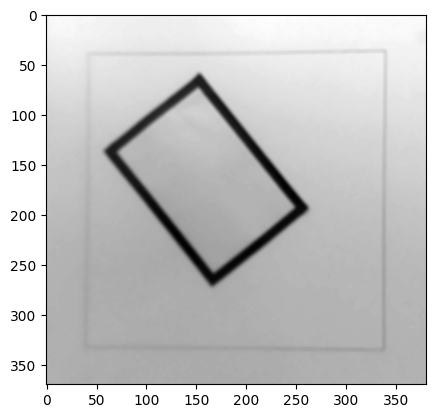

In [5]:
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(grey, (5, 5), 2, 2)
plt.imshow(blurred, cmap='gray')

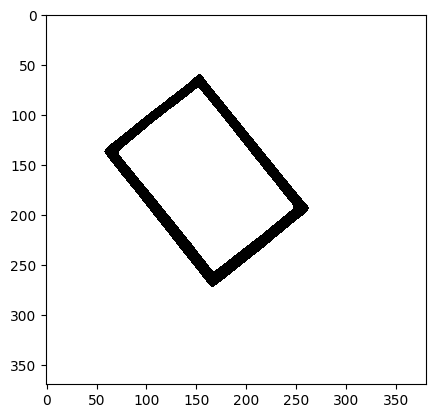

In [24]:
ok, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
inv_binary = cv2.bitwise_not(binary)
plt.imshow(inv_binary, cmap='gray')

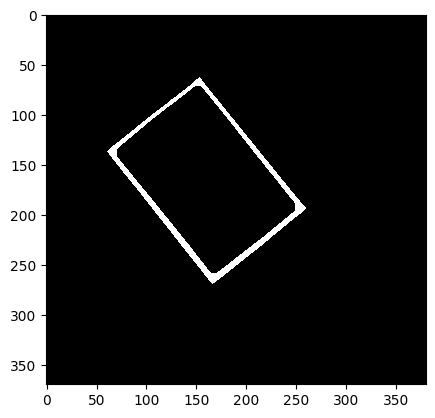

In [33]:
kernel = np.ones((5,5),np.uint8)
opened = cv2.morphologyEx(inv_binary, cv2.MORPH_OPEN, kernel)
kernel = np.ones((3,3),np.uint8)
eroded = cv2.erode(opened, kernel, iterations=2)
plt.imshow(eroded, cmap='gray')

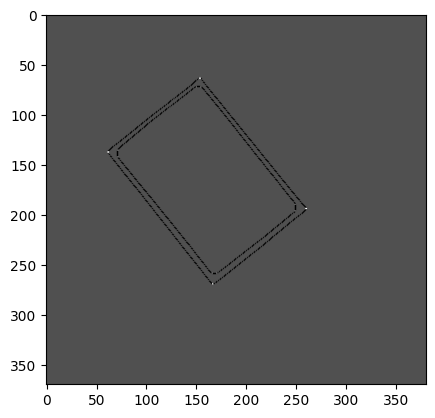

In [35]:
# https://docs.opencv.org/4.8.0/dc/d0d/tutorial_py_features_harris.html
dst = cv2.cornerHarris(eroded, 2, 3, 0.04)
plt.imshow(dst, cmap='gray')

x: 167.0, y: 269.0, r: 1.7999999523162842
x: 259.0, y: 195.0, r: 1.7999999523162842
x: 57.0, y: 137.0, r: 1.7999999523162842
x: 149.0, y: 63.0, r: 1.7999999523162842


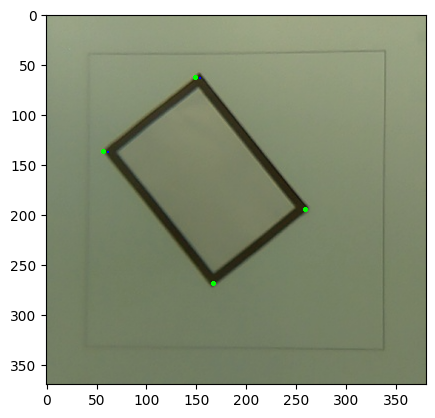

In [68]:
# try these?
# https://docs.opencv.org/3.4/df/d0c/tutorial_py_fast.html
# https://docs.opencv.org/3.4/db/d27/tutorial_py_table_of_contents_feature2d.html

res = img.copy()
res[dst > 0.1*dst.max()] = [0, 0, 255]
mask = dst.copy()
mask[mask > 0.1*dst.max()] = 255
# merge similar regions
kernel = np.ones((5, 5), np.uint8)
mask = cv2.dilate(mask, kernel, iterations=1).astype(np.uint8)
# similar points to one
circles = cv2.HoughCircles(
    mask,
    method=cv2.HOUGH_GRADIENT,
    dp=2,
    minDist=10,
    param1=3,
    param2=3,
    minRadius=1,
    maxRadius=3)
# points = cv2.findNonZero(mask)
# for p in points:
#   x, y = p[0]
#   print("x: {}, y: {}".format(x, y))
for c in circles[0,:]:
    if c is not None:
        x, y, r = c
        print("x: {}, y: {}, r: {}".format(x, y, r))
        x = int(x)
        y = int(y)
        r = int(r)
        cv2.circle(res, (x, y), r, (0, 255, 0), 2)
plt.imshow(res)
